In [2]:
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline


In [ ]:
# Heading: Kaggle Telco Customer Churn
#Qn-1: Demographic
#a--- Which two demographic have proven to be the most popular with the telco brand.

In [3]:
#Loading the Telco Customer Churn File---telcom.csv
telcom=pd.read_csv('telcom.csv')
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
# Studying the dataset in more detail
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telcom.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [6]:
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#There is need to convert TotalCharges to numeric
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges,errors='coerce')
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Drop the Null/Nan Values
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges,errors='coerce')
telcom.dropna(inplace = True)
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Heading: Kaggle Telco Customer Churn
#Qn-1: Demographic
#a--- Which two demographic have proven to be the most popular with the telco brand.
# Answer: Demographics can be understood from Gender, Age Range (Senior Citizen), Partner and Dependents
# Gender First
ax = (telcom['gender'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% of Sex', fontsize = 12)

Text(0.5, 1.0, '% of Sex')

In [10]:
# Age Group using SeniorCitizen
ax = (telcom['SeniorCitizen'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '% of Senior Citizens')

In [12]:
# Partners
ax = (telcom['Partner'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['Have No Partner', 'Have Partner'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Partner',fontsize = 12)
ax.set_title('% of Partners', fontsize = 12)

Text(0.5, 1.0, '% of Partners')

Text(0.5, 1.0, '% of Dependents')

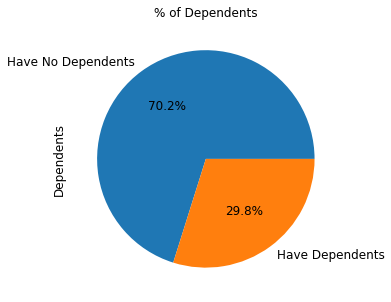

In [13]:
ax = (telcom['Dependents'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['Have No Dependents', 'Have Dependents'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Dependents',fontsize = 12)
ax.set_title('% of Dependents', fontsize = 12)

In [19]:
print('From above, pie charts its observed that the two most popular demographics are none Senior Citizens(Young age-83.8%) as well as\nthose with no dependents(70.2%)\n\nIts also oberved that gender appx 50/50 and status(partners/no partners appx 50/50) are evenly matched and thus equally popular')

From above, pie charts its observed that the two most popular demographics are none Senior Citizens(Young age-83.8%) as well as
those with no dependents(70.2%)

Its also oberved that gender appx 50/50 and status(partners/no partners appx 50/50) are evenly matched and thus equally popular


In [22]:
#Qn-1: Demographic
#b--- If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?
# By comparing Churn with Dependents and Senior citizens using pd.crosstab
#pd.crosstab(telcom.SeniorCitizen,telcom.Churn).plot.bar()
pd.crosstab(telcom.SeniorCitizen,telcom.Churn)


Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476

In [60]:
pd.crosstab(telcom.SeniorCitizen,telcom.Churn).plot.bar()
plt.ylabel('Churn among Citizens')
plt.xlabel('SeniorCitizen')
plt.title('Contingency Table of SeniorCitizen and Churn')
plt.show()

In [24]:
#pd.crosstab(telcom.Dependents,telcom.Churn).plot.bar()
pd.crosstab(telcom.Dependents,telcom.Churn)


Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326

In [59]:
pd.crosstab(telcom.Dependents,telcom.Churn).plot.bar()
plt.ylabel('Churn among Dependents')
plt.xlabel('Dependents')
plt.title('Contingency Table of Dependents and Churn')
plt.show()

In [28]:
print('Its observed from the two most popular demographics that the percentage of those Churning among those with No dependents\nis higher compared to that of Non- Senior citizens(young age) and as such the marketing team should target advertisments\nto those with No dependents')

Its observed from the two most popular demographics that the percentage of those Churning among those with No dependents
is higher compared to that of Non- Senior citizens(young age) and as such the marketing team should target advertisments
to those with No dependents


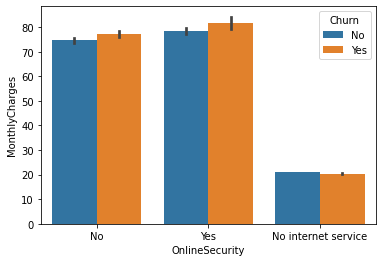

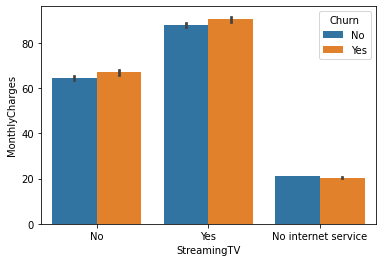

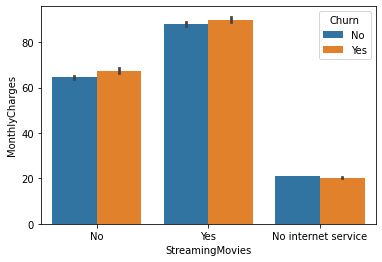

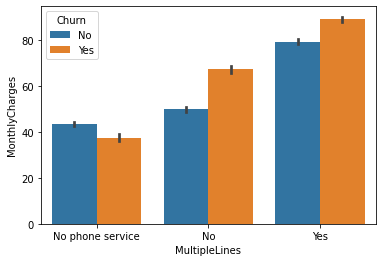

In [29]:
#Qn-2: Services
#a--- Which 3 services are contributing to a higher monthly charge and resulting to customers churning?
# The following services have been considered 'PhoneService' , 'OnlineSecurity',OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
#'StreamingMovies','PaperlessBilling','MultipleLines','InternetService'
for col in ('PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','InternetService'):
        sns.barplot(x = col, y = 'MonthlyCharges',hue='Churn',data = telcom)
        plt.show()

In [52]:
print('From the bar graphs above and around monthly charge of 80, its observed that the three services contributing a higher monthly\ncharge also resulting into customer churning are those with Multiplelines(Yes),those who streammovies(yes) and those who\nstreamTV(yes)\n\nIts also generally observed that for every service, churn rate(yes) is higher with exception of the internet service.')

From the bar graphs above and around monthly charge of 80, its observed that the three services contributing a higher monthly
charge also resulting into customer churning are those with Multiplelines(Yes),those who streammovies(yes) and those who
streamTV(yes)

Its also generally observed that for every service, churn rate(yes) is higher with exception of the internet service.


In [38]:
#Qn-2: Services
#b--- If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?
#Answer-- by applying pd.crosstab to both Contract and Phoneservice....
#pd.crosstab(telcom.Contract,telcom.PhoneService).plot.bar()
pd.crosstab(telcom.Contract,telcom.PhoneService)

PhoneService     No   Yes
Contract                 
Month-to-month  376  3499
One year        145  1327
Two year        159  1526

In [58]:
pd.crosstab(telcom.Contract,telcom.PhoneService).plot.bar()
plt.ylabel('PhoneService Users')
plt.xlabel('Contract Type')
plt.title('Contingency Table of PhoneService and Contract')
plt.show()

In [40]:
print('Its observed that the Month-to-Month Contract would encourage customer retention')

Its observed that the Month-to-Month Contract would encourage customer retention


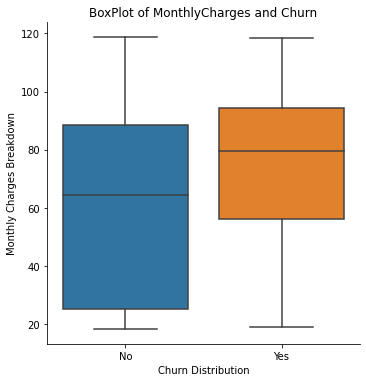

In [56]:
#Qn-3: Payment
#a--- If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
#Answer-- by applying sns.catplot(x="Churn", y="MonthlyCharges", data=telcom,kind='box').
sns.catplot(x="Churn", y="MonthlyCharges", data=telcom,kind='box')
plt.ylabel('Monthly Charges Breakdown')
plt.xlabel('Churn Distribution')
plt.title('BoxPlot of MonthlyCharges and Churn')
plt.show()

In [44]:
print('In order to keep customers from churning(Churn-No), the rates for the 3 bouquet packages can be set at Basic: 20, Plus:50, \nPremium:65 and all these rates are all below the average charge for churn(yes) which is around 80 mark. ')

In order to keep customers from churning(Churn-No), the rates for the 3 bouquet packages can be set at Basic: 20, Plus:50, 
Premium:65 and all these rates are all below the average charge for churn(yes) which is around 80 mark. 


In [45]:
#Qn-3: Payment
#b--- Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?
#Answer-- by applying pd.crosstab to both Churn and PaperlessBilling....
#pd.crosstab(telcom.Churn,telcom.PaperlessBilling).plot.bar()
pd.crosstab(telcom.Churn,telcom.PaperlessBilling)

PaperlessBilling    No   Yes
Churn                       
No                2395  2768
Yes                469  1400

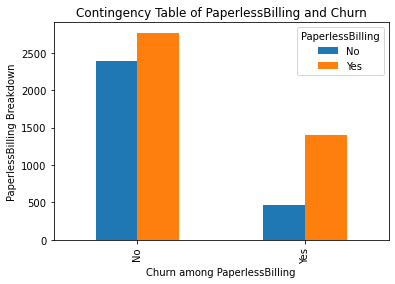

In [57]:
pd.crosstab(telcom.Churn,telcom.PaperlessBilling).plot.bar()
plt.ylabel('PaperlessBilling Breakdown')
plt.xlabel('Churn among PaperlessBilling')
plt.title('Contingency Table of PaperlessBilling and Churn')
plt.show()

In [49]:
print('From the above bar graphs its observed that the company should go for paperless billing since in order to keep customers since\nthe current(Churn-No) and customerrs who left (churn-yes) all prefer/preffered paperless biling(yes)')

From the above bar graphs its observed that the company should go for paperless billing since in order to keep customers since
the current(Churn-No) and customerrs who left (churn-yes) all prefer/preffered paperless biling(yes)
